In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Defining Functions

In [2]:
def softmax(X):
    exp_X = np.exp(X)
    return exp_X/np.sum(exp_X, axis=1, keepdims=True)

In [3]:
def normalise(X):
    max_X = np.max(X)
    X_norm = X/max_X
    
    return X_norm

In [4]:
def one_hot(y,num_classes):
    m, = y.shape
    y_hot = np.zeros([m,num_classes])
    for i in range(m):
        y_hot[i, y[i]] = 1
        
    return y_hot

In [5]:
def initialise_parameters(X, y):
    m,n = X.shape
    k = np.unique(y).shape[0]
    w = np.zeros((k,n))
    b = np.zeros((1,k))
    return w, b

In [6]:
def compute_cost(X,y,w,b,one_hot):
    m,n = X.shape
    z = X@w.T + b
    y_hat = softmax(z)
    log_y = np.log(y_hat)
    y_hot = one_hot(y,b.shape[1])
    d = 1e-8
    cost = -(np.sum(y_hot*(log_y + d)))/m
    return cost

In [7]:
def gradient(X,y,w,b,one_hot):
    m,n = X.shape
    k = b.shape[1]
    z = X@w.T + b
    y_hat = softmax(z)
    y_hot = one_hot(y,k)
    
    dj_dw = (X.T)@(y_hat - y_hot)
    dj_db = np.sum((y_hat - y_hot), axis=0, keepdims=True)
    
    return np.transpose(dj_dw),dj_db

In [8]:
def predict(X,w,b):
    m = X.shape[0]
    k = w.shape[0]
    z = X@w.T + b
    prob = softmax(z)
    pred = np.argmax(prob, axis=1)
    
    return pred

In [9]:
def accuracy(X,y,w,b):
    pred = predict(X,w,b)
    subs = pred - y
    correct = list(subs).count(0)
    accuracy = (correct/len(pred))
    return accuracy

In [10]:
def gradient_descent(X,y,X_test,y_test,w_in,b_in,one_hot,compute_cost,gradient,alpha,epochs):
    
    J = []
    w = w_in
    b = b_in
    for i in range(epochs):
        dj_dw,dj_db = gradient(X,y,w,b,one_hot)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i<100000:
            J.append(compute_cost(X,y,w,b,one_hot))
        
        if i%np.ceil(epochs/10)==0:
            print(f"\nEpoch {i:5d}: Cost {J[-1]:5.10f} \t Train_acc: {accuracy(X,y,w,b)*100:6.2f}% \t Test_acc: {accuracy(X_test,y_test,w,b)*100:6.2f}%")
        
        if i%np.ceil((epochs/10)/25)==0:
            print('==', end='')
    
    print(f"\nFinal Cost: {J[-1]:5.10f} \t Train_acc: {accuracy(X,y,w,b)*100:6.2f}% \t Test_acc: {accuracy(X_test,y_test,w,b)*100:6.2f}%")    
    print(f"\nb,w found by gradient descent:\nb_final =\n {b}\nw_final =\n {w}")
    
    return w,b,J

In [11]:
def cost_vs_epochs(J,epochs):
    style.use('ggplot')
    e = np.array([])
    for i in range(1,epochs+1):
        e = np.append(e,i)
    plt.plot(e,J)
    plt.title('Cost vs Epochs')
    plt.xlabel('No. of Epochs')
    plt.ylabel('Cost')

In [12]:
def cf_matrix(X,y,w,b):
    pred = predict(X,w,b)
    k = np.unique(y)
    c = []
    for i in k:
        indices = np.where(y==i)
        data = pred[indices]
        count = []
        for j in k:
            count.append(list(data).count(j))
        c.append(count)
    return pd.DataFrame(c)

In [13]:
def f1_score(X,y,w,b):
    c = cf_matrix(X,y,w,b).to_numpy()
    m = c.shape[0]
    a = np.diagonal(c)
    total_c = np.sum(c, axis=1)
    total_r = np.sum(c, axis=0)
    precision = a/total_r
    recall = a/total_c
    f1 = np.sum(2*((precision*recall)/(precision + recall)))/m
    return f1

# Adding Training, Cross-Validation and Test Data Sets

In [14]:
df = pd.read_csv('Classification_train.csv')
df_test = pd.read_csv('Classification_test.csv')

In [15]:
df_train = df.head(25000)
df_cv = df.tail(5000)
X_train = df_train.drop('label',axis=1).to_numpy()
y_train = df_train.iloc[:,0].to_numpy()
X_cv = df_cv.drop('label',axis=1).to_numpy()
y_cv = df_cv.iloc[:,0].to_numpy()
X_train_norm = normalise(X_train)
X_cv_norm = normalise(X_cv)

X_test = df_test.drop('ID', axis=1).to_numpy()
X_test_norm = normalise(X_test)

In [19]:
w, b = initialise_parameters(X_train,y_train)

# Running Logistic Regression Model

In [20]:
alpha = 5e-5
epochs = 500
wf,bf,J = gradient_descent(X_train_norm,y_train,X_cv_norm,y_cv,w,b,one_hot,compute_cost,gradient,alpha,epochs)


Epoch     0: Cost 1.4764299395 	 Train_acc:  80.77% 	 Test_acc:  80.76%
Epoch    50: Cost 0.2309695143 	 Train_acc:  94.67% 	 Test_acc:  94.56%
Epoch   100: Cost 0.1843411528 	 Train_acc:  95.62% 	 Test_acc:  95.38%
Epoch   150: Cost 0.1632021866 	 Train_acc:  96.04% 	 Test_acc:  95.68%
Epoch   200: Cost 0.1502125832 	 Train_acc:  96.30% 	 Test_acc:  96.02%
Epoch   250: Cost 0.1410642744 	 Train_acc:  96.50% 	 Test_acc:  96.12%
Epoch   300: Cost 0.1341014394 	 Train_acc:  96.64% 	 Test_acc:  96.20%
Epoch   350: Cost 0.1285309894 	 Train_acc:  96.73% 	 Test_acc:  96.28%
Epoch   400: Cost 0.1239174215 	 Train_acc:  96.81% 	 Test_acc:  96.26%
Epoch   450: Cost 0.1199980762 	 Train_acc:  96.88% 	 Test_acc:  96.28%
Final Cost: 0.1166668773 	 Train_acc:  96.95% 	 Test_acc:  96.36%

b,w found by gradient descent:
b_final =
 [[-0.55764536  0.62301374 -0.04920092 -0.33726455 -0.17755498 -0.85649245
   0.77276695  0.06533069  0.11167728  0.40536959]]
w_final =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 

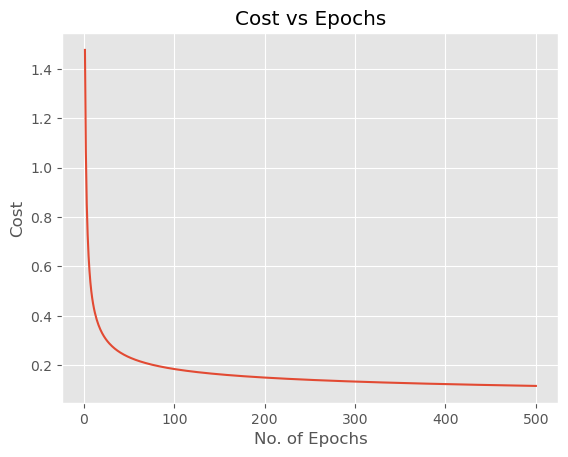

In [21]:
cost_vs_epochs(J,epochs)

In [22]:
misclassifications = np.ceil((1 - accuracy(X_cv_norm,y_cv,wf,bf))*X_cv_norm.shape[0])
print("Total no. of cross validation examples misclassified by the model:",misclassifications)

Total no. of cross validation examples misclassified by the model: 182.0


# Confusion Matrix and F1 Score on CV Data Set

In [23]:
cf = cf_matrix(X_cv_norm,y_cv,wf,bf)
cf

,0,1,2,3,4,5,6,7,8,9
0,455,13,0,1,0,1,0,3,1,1
1,4,492,0,1,0,0,0,0,0,2
2,2,0,502,2,0,0,0,0,0,0
3,8,0,0,482,2,4,4,9,0,0
4,1,0,0,3,495,5,0,0,1,5
5,0,1,0,5,6,505,1,1,0,0
6,0,0,0,4,0,2,477,17,0,6
7,2,0,1,12,1,0,23,456,0,2
8,4,1,0,1,0,0,0,0,459,3
9,1,0,0,2,7,0,3,2,1,495


In [24]:
f1 = f1_score(X_cv_norm,y_cv,wf,bf)
f1

0.9636514941626612

# Running on Test Data Set

In [25]:
df_t = pd.DataFrame(predict(X_test_norm,wf,bf), columns=['Predictions'])

df_t

,Predictions
0,0
1,4
2,5
3,5
4,6
...,...
9995,9
9996,9
9997,0
9998,8


In [26]:
df_t.to_csv('Logistic_pred.csv')